In [2]:
pip install pandas numpy scikit-learn xgboost matplotlib seaborn

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
df = pd.read_excel('/content/heart_disease_risk_dataset_earlymed.xls')
print(df.head())

   age  cp  sob  fatigue  palpitations  dizziness  swelling  radiating_pain  \
0   37   0    1        0             1          0         0               0   
1   31   0    0        1             0          0         0               0   
2   60   0    0        1             1          1         0               0   
3   59   0    0        0             1          0         0               0   
4   70   0    0        0             0          0         0               0   

   cold_sweats  hypertension  cholesterol_high  diabetes  smoker  obesity  \
0            0             1                 1         0       0        1   
1            0             1                 0         0       0        1   
2            0             1                 0         0       0        0   
3            0             1                 0         0       1        1   
4            0             0                 1         0       1        0   

   family_history  risk_label  
0               0           1 

In [7]:

print(df.isnull().sum())




X = df.drop('risk_label', axis=1)  # Outcome = label column
y = df['risk_label']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

age                 0
cp                  0
sob                 0
fatigue             0
palpitations        0
dizziness           0
swelling            0
radiating_pain      0
cold_sweats         0
hypertension        0
cholesterol_high    0
diabetes            0
smoker              0
obesity             0
family_history      0
risk_label          0
dtype: int64


In [8]:
models = {
    "SVM": SVC(kernel='rbf', probability=True),
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name} Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))



SVM Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       203
           1       1.00      1.00      1.00     12904

    accuracy                           1.00     13107
   macro avg       1.00      1.00      1.00     13107
weighted avg       1.00      1.00      1.00     13107


Logistic Regression Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       203
           1       1.00      1.00      1.00     12904

    accuracy                           1.00     13107
   macro avg       1.00      1.00      1.00     13107
weighted avg       1.00      1.00      1.00     13107


Random Forest Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       203
           1       1.00      1.00      1.00     12904

    accuracy                           1.00     13107
   macro avg       1.00      1.00   

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:50:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       203
           1       1.00      1.00      1.00     12904

    accuracy                           1.00     13107
   macro avg       1.00      1.00      1.00     13107
weighted avg       1.00      1.00      1.00     13107



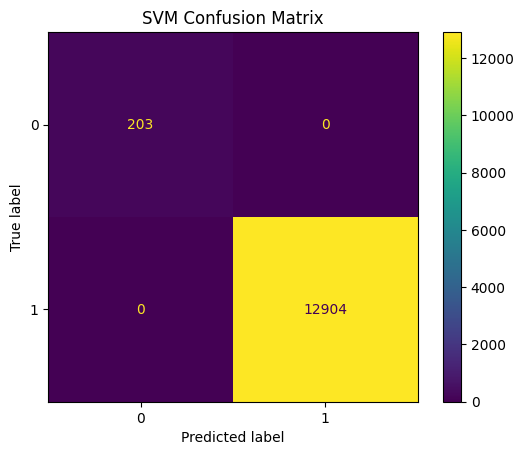

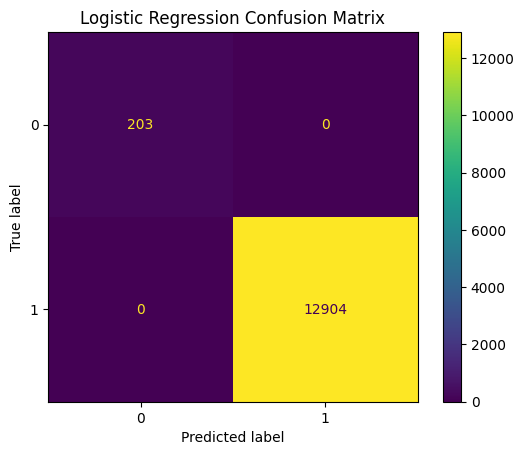

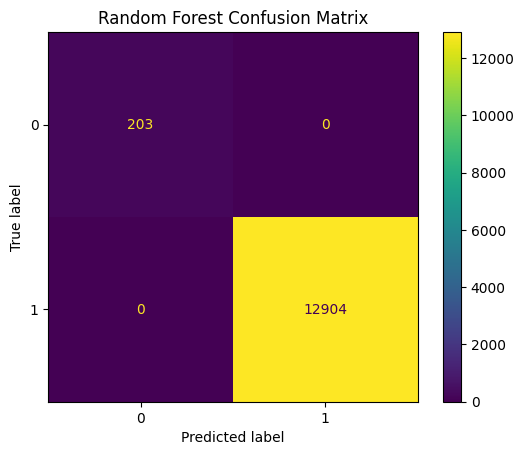

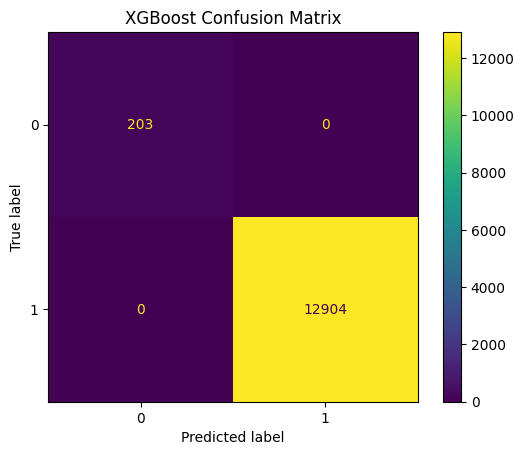

In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

for name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f"{name} Confusion Matrix")
    plt.show()
